In [1]:
#tuon kirjastot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#avaan datan
df=pd.read_excel('http://taanila.fi/Concrete_Data.xlsx')
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [3]:
correlation_matrix = df.corr()

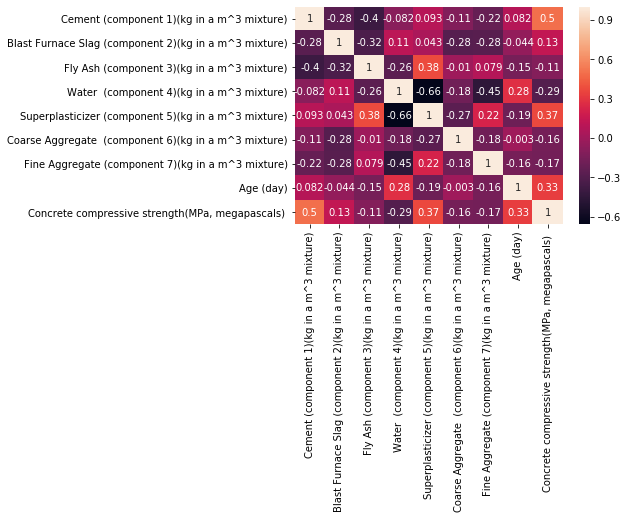

In [4]:
#käytetään väritehosteita seaborn-kirjastosta, toiminto annot=True näyttää korrelaatiokertoimen lukuarvot
sns.heatmap(data=correlation_matrix, annot=True)

In [23]:
#otetaan viisi betonin lujuuteen vaikuttavaa muuttujaa mukaan ja määritellään ne listana []
X = df[['Blast Furnace Slag (component 2)(kg in a m^3 mixture)','Fly Ash (component 3)(kg in a m^3 mixture)',
        'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
        'Age (day)']]
y = df['Cement (component 1)(kg in a m^3 mixture)']

In [6]:
#kirjastosta haetaan malli, jota käytetään
from sklearn.linear_model import LinearRegression

#sovitetaan se malliin funktiolla.fit() ja sovitetaan ne X: ja y:hyn
malli = LinearRegression().fit(X,y)

In [7]:
#regressiosuoran kulmakertoimen .coef_ (selittää sen, että paljonko betonin lujuus kasvaa x-muuttujien kasvaessa)
malli.coef_

array([-0.83219986, -1.27953556,  9.02000587, -0.62027893, -0.07333467])

In [8]:
# vakiotermi funktiolla .intercept_ y-akselin leikkauspiste (eli betonin lujuus silloin, kuin muuttujat X ovat 0)
malli.intercept_

839.2270082834084

In [9]:
#selityskertoimen suuruus funktiolla .score(), se selittää kuinka paljon betonin lujuuden muutos selittyy X muuttujien muutoksella
malli.score(X,y)

0.6506921512141717

Text(0, 0.5, 'Ennustevirhe')

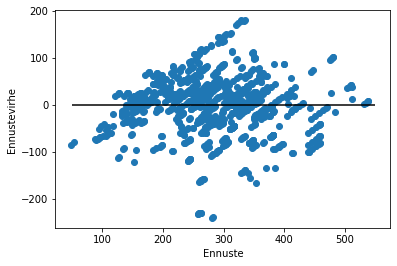

In [10]:
#tarkastellaan mallin sopivuutta käytettyyn dataan
#scatter-hajontaakaaviossa otetaan x-akselille malliolion käyttämät ennusteet, y-akselille ennustevirheet = mallin antamista ennusteista miinustetaan y
plt.scatter(malli.predict(X), malli.predict(X)-y)


#piirretään (vaakasuuntainen) apuviiva kaavioon .hlines ja määrittää mistä mihin viiva menee xmin=50, xmax=550
plt.hlines(y=0, xmin=50, xmax=550)

#otsikoidaan x ja y-akseli
plt.xlabel('Ennuste')
plt.ylabel('Ennustevirhe')


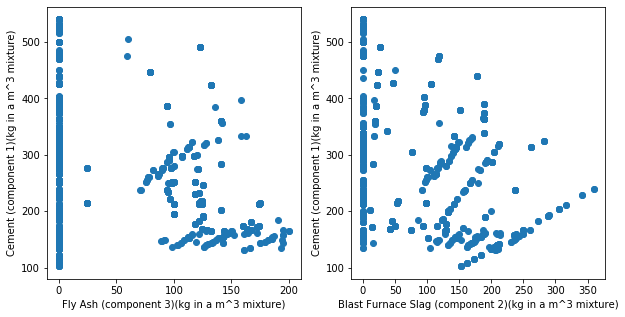

In [14]:
#tutkitaan miltä riippuvuus näyttää seuraavien tekijöiden välillä
#nimetään x , määritetään lista 

feature = ['Fly Ash (component 3)(kg in a m^3 mixture)','Blast Furnace Slag (component 2)(kg in a m^3 mixture)']
#nimetään y 
target = df['Cement (component 1)(kg in a m^3 mixture)']

#tehdään pistekaavio ja määritellään sen koko
plt.figure(figsize=(10, 5))

#tehdään kaavionlaadinta, jossa käydään koko feature-lista läpi
#for-silmukka on ohjelmointikielessä toistorakenne

#enumerate palauttaa listasta lista-alkion järjestysnumeron ja palauttaa lista-alkion nimen listasta
for i, feature in enumerate(features) : 
    plt.subplot(1, len(features), i+1)
    plt.scatter(df[feature], target)
    plt.xlabel(feature)
    plt.ylabel('Cement (component 1)(kg in a m^3 mixture)')
# : kertoo että for-silmukan komennot alkavat
#.subplot() tekee kuvion sisään yksittäisen kaavion kuvion sisään
#len-funktio antaa pituuden (kuinka monta alkiota listassa on)
# i+1 nollasta tulee ykkönen
#määrittelen kaavion .scatter() ja se tehdään featuresta jonka kohdalla olaan for-silmukassa
#xlabel ja ylabel nimeää akselit

In [15]:
#sijoitan aiemmin nimeämäni listat x:n ja y:hyn

X = df[features]
y = target

In [16]:
from sklearn.model_selection import train_test_split

#annetaan opetusdatalle nimeksi X_train, testidatalle nimeksi X_test, y_train ja testidata y_train
#test_size=0.2 määritellään testidatan kooksi 20 % datasta
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

#todennetaan minkä kokoisia tästä syntyy
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(824, 2)
(206, 2)
(824,)
(206,)


In [17]:
#tuodaan malli sklearn-kirjastosta

from sklearn.linear_model import LinearRegression

#sovitetaan sen malliin funktiolla .fit() ja ei näytetä sille testidataa

malli = LinearRegression().fit(X_train, y_train)

In [18]:
#lasketaan kerroin
malli.coef_

array([-0.91553944, -0.53994353])

In [19]:
#x ja y leikkaa toisensa
malli.intercept_

372.45444641416003

In [20]:

malli.score(X_train, y_train)

0.33832191528348

In [21]:
malli.score(X_test, y_test)

0.3379174164073795